<a href="https://colab.research.google.com/github/ManjushaNagaraj/SENTIMENT-ANALYSIS-USING-BERT-/blob/main/setiment_analysis(creation_of_dtaset)_MANJUSHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
!pip install -qq google-play-scraper

In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

#COLLECTING REVIEWS

In [ ]:
app_packages =  [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [ ]:
len(app_packages)

15

## Scraping App Information

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='english', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  6.42it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[6])

{
  "adSupported": true,
  "appId": "com.levor.liferpgtasks",
  "containsAds": true,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Organize your life with Do It Now - fantastical to do list which helps you to add game elements into your everyday tasks, make schedule, add daily reminders and organize your life with built-in skills, characteristics and level ups.\r\n\r\n\ud83c\udfae <b>Gamify your things to do</b> (gtd)\r\nWith our reminders app you will get virtual copy of yourself with be able to track your skills, characteristics and statistics. Every task can be bound to skills and characteristics. When task is performed in real life - your virtual hero will get skills and characteristics increased, gain additional experience (XP) and could level up life.\r\n\r\n\ud83e\udde0 <b>Self improvement</b>\r\nTrack personal growth in different areas with customizable characteristics. Increase your everyday productivity by creating f

#information including the number of ratings, number of reviews and number of ratings for each score (1 to 5).

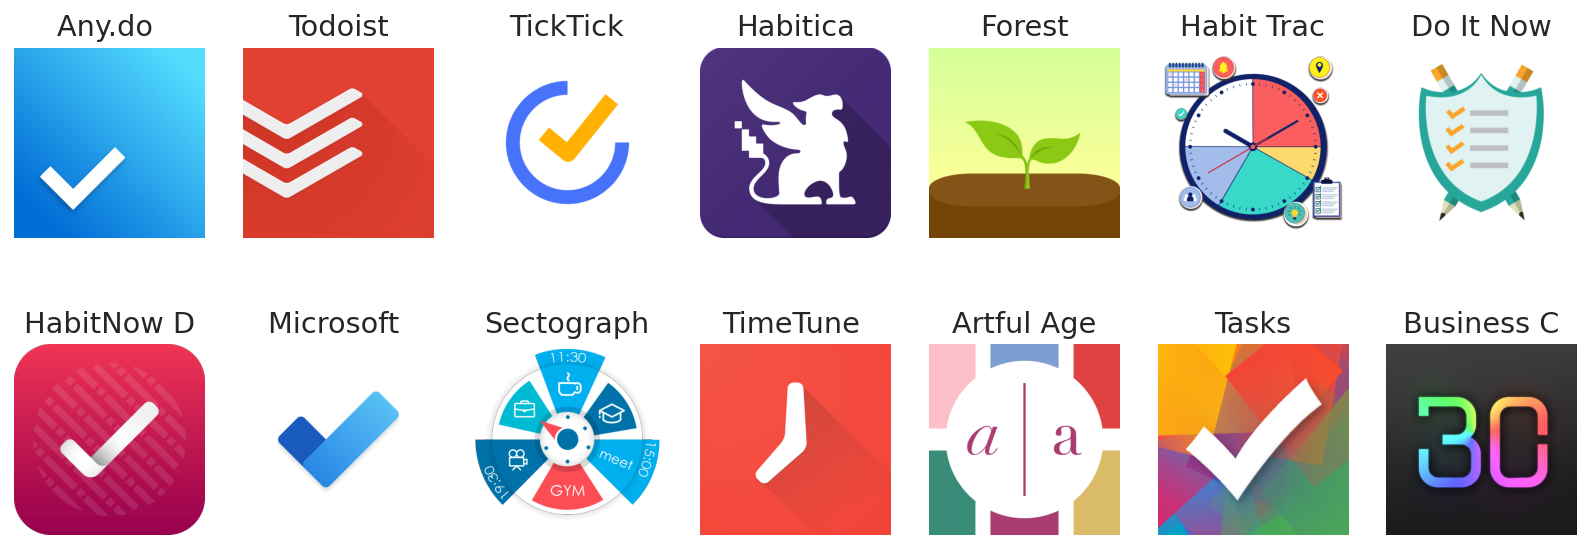

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

# We'll store the app information for later by converting the JSON objects into a Pandas dataframe and saving the result into a CSV file:

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('manjusha_apps.csv', index=None, header=True)

# Getting App reviews

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:37<00:00,  2.51s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2019-01-12 13:20:28",
  "content": "This app was great until the latest update and the grocery list changed. Now, it's just annoying to use. It takes more steps to get to what I want to do. The app forces a default list to display that I don't use, so I have to navigate back to the home screen to get to the grocery list. I preferred generic Shopping List where I would enter all items. I don't want a different list for each store. The predictive function stinks because you have to clear the field after you add the suggested text.",
  "repliedAt": "2019-01-27 15:44:37",
  "replyContent": "We are sorry you feel this way, please note that you can disable the Grocery List from your setting (Setting &gt; set Smart Grocery List too off). You are in no way obligated to use the Smart List :)",
  "reviewCreatedVersion": "4.12.0.5",
  "reviewId": "a6b21375-312e-41b5-90ab-3d56273ca01b",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 24,
  "userI

In [ ]:
app_review_df=pd.DataFrame(app_reviews)
app_review_df.shape

(17268, 12)

In [ ]:
app_review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,a6b21375-312e-41b5-90ab-3d56273ca01b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app was great until the latest update and...,1,24,4.12.0.5,2019-01-12 13:20:28,"We are sorry you feel this way, please note th...",2019-01-27 15:44:37,most_relevant,com.anydo
1,1177566d-6443-42ab-8320-7e8b3342cec8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Product images show the month view at the top ...,1,4,None,2019-07-06 21:14:32,We appreciate the feedback. The images for iOS...,2019-07-09 11:45:56,most_relevant,com.anydo
2,82d2f0c3-dbff-4722-89fa-d8af997ba4ab,Hyco Syco,https://play-lh.googleusercontent.com/a/AItbvm...,This app used to be great when paired with Ale...,1,3,4.15.9.6,2020-06-17 17:32:55,"Sorry about that, our team is currently workin...",2020-06-18 06:47:52,most_relevant,com.anydo
3,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very annoyed that I have to keep signing in an...,1,21,4.15.8.11,2019-09-29 16:03:25,"Hi, that's odd, please send us a bug report in...",2019-10-02 19:51:43,most_relevant,com.anydo
4,05a38690-e873-4ed2-a9eb-792de80d7982,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I really do like this app, but I have horrible...",1,133,4.14.1.2,2019-02-24 22:02:27,None,NaT,most_relevant,com.anydo


#save the reviews to a CSV file:

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)